# Dataset 2 - United States Mortality Rates and Life Expectancy by State, Race and Ethnicity
https://www.healthdata.org/research-analysis/library/cause-specific-mortality-county-race-and-ethnicity-usa-2000-19

**Research Question:** Can regression models predict mortality rates based on demographic factors such as state, race, and age group?

**Method:** CRISP-DM

**Regression Models:** Linear Regression, RandomForestRegression, GradientBoostingRegression, LightGBM Regressor, XGBoost Regressor

## Data Loading

In [1]:
# import relevant libraries for data analysis and visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# read data from csv file
df = pd.read_csv('IHME_USA_LE_STATE_RACE_ETHN_2000_2019_DATA_Y2022M06D28.CSV')

In [3]:
# access only the mortality rates
mortality_df = df[df['metric_name']=='Rate'].reset_index(drop=True)

In [4]:
mortality_df.head()

,measure_id,measure_name,location_id,location_name,state_name,race_ethnicity_group,sex_id,sex_name,age_group_id,age_group_name,year_id,metric_id,metric_name,val,upper,lower
0,14,All-cause mortality rate,523,Alabama,Alabama,State-level,1,Male,5,1 to 4,1990,3,Rate,0.000588,0.000684,0.000496
1,14,All-cause mortality rate,523,Alabama,Alabama,State-level,1,Male,5,1 to 4,1991,3,Rate,0.000604,0.000701,0.000517
2,14,All-cause mortality rate,523,Alabama,Alabama,State-level,1,Male,5,1 to 4,1992,3,Rate,0.000586,0.000676,0.000500
3,14,All-cause mortality rate,523,Alabama,Alabama,State-level,1,Male,5,1 to 4,1993,3,Rate,0.000588,0.000678,0.000504
4,14,All-cause mortality rate,523,Alabama,Alabama,State-level,1,Male,5,1 to 4,1994,3,Rate,0.000567,0.000656,0.000484


In [5]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290700 entries, 0 to 290699
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   measure_id            290700 non-null  int64  
 1   measure_name          290700 non-null  object 
 2   location_id           290700 non-null  int64  
 3   location_name         290700 non-null  object 
 4   state_name            290700 non-null  object 
 5   race_ethnicity_group  290700 non-null  object 
 6   sex_id                290700 non-null  int64  
 7   sex_name              290700 non-null  object 
 8   age_group_id          290700 non-null  int64  
 9   age_group_name        290700 non-null  object 
 10  year_id               290700 non-null  int64  
 11  metric_id             290700 non-null  int64  
 12  metric_name           290700 non-null  object 
 13  val                   221160 non-null  float64
 14  upper                 221160 non-null  float64
 15  

## Data Understanding

In [6]:
# shorten data values inside dataset
ethn = {
    'State-level':'State-level',
    'Hispanic, Any race':'Hispanic',
    'Non-Hispanic, Other races':'Other',
    'Non-Hispanic, Black':'Black',
    'Non-Hispanic, White':'White'
 }
mortality_df['race_ethnicity_group'] = mortality_df['race_ethnicity_group'].apply(lambda x: ethn[x])

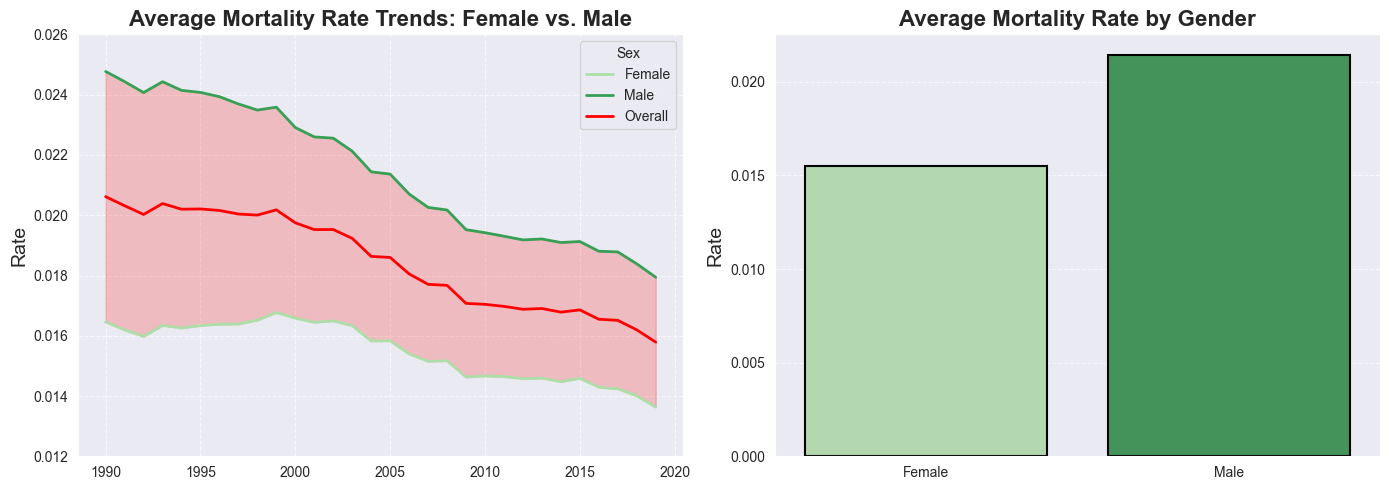

In [7]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
# prepare the data and plot line plots
sex_seg = mortality_df.groupby(['year_id', 'sex_name']).agg({'val':'mean'}).reset_index()
sns.lineplot(data=sex_seg, x='year_id', y='val', hue='sex_name', palette='Greens', linewidth=2)
sns.lineplot(data=sex_seg, x='year_id', y='val', color='red', label='Overall', linewidth=2)

plt.xlabel(None)
plt.ylabel('Rate', fontsize=14)
plt.title('Average Mortality Rate Trends: Female vs. Male', fontsize=16, fontweight='bold')
plt.ylim([0.012, 0.026])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sex', loc='best')

plt.subplot(1,2,2)
# barplot for average mortality rate by gender
gender_avg = mortality_df.groupby(['sex_name']).agg({'val':'mean'}).reset_index()
sns.barplot(data=gender_avg, x='sex_name', y='val', hue='sex_name', palette='Greens', edgecolor='black', linewidth=1.5)

plt.xlabel(None)
plt.ylabel('Rate', fontsize=14)
plt.title('Average Mortality Rate by Gender', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

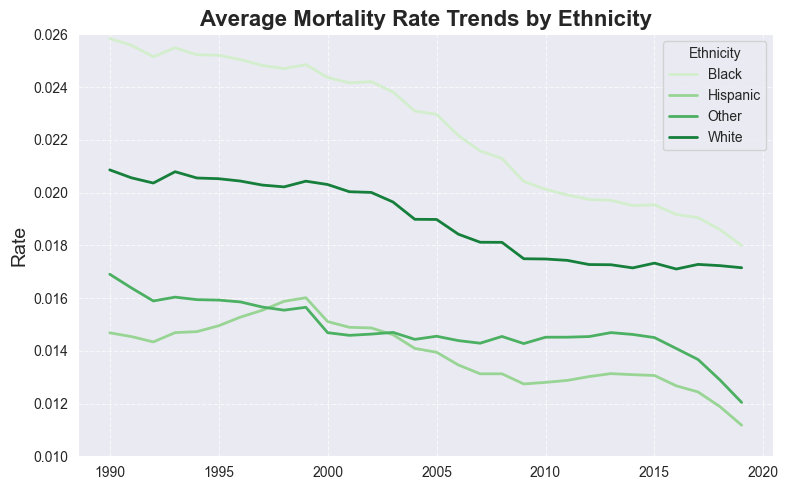

In [8]:
# lineplot for race/ethnicity
race_seg = mortality_df.groupby(['year_id', 'race_ethnicity_group']).agg({'val':'mean'}).reset_index()
race_seg = race_seg[~race_seg['race_ethnicity_group'].isin(['State-level'])]

plt.figure(figsize=(8, 5))
sns.lineplot(data=race_seg, x='year_id', y='val', hue='race_ethnicity_group', palette='Greens', linewidth=2)

plt.xlabel(None)
plt.ylabel('Rate', fontsize=14)
plt.title('Average Mortality Rate Trends by Ethnicity', fontsize=16, fontweight='bold')
plt.ylim([0.010, 0.026])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Ethnicity', loc='best')
plt.tight_layout()
plt.show()

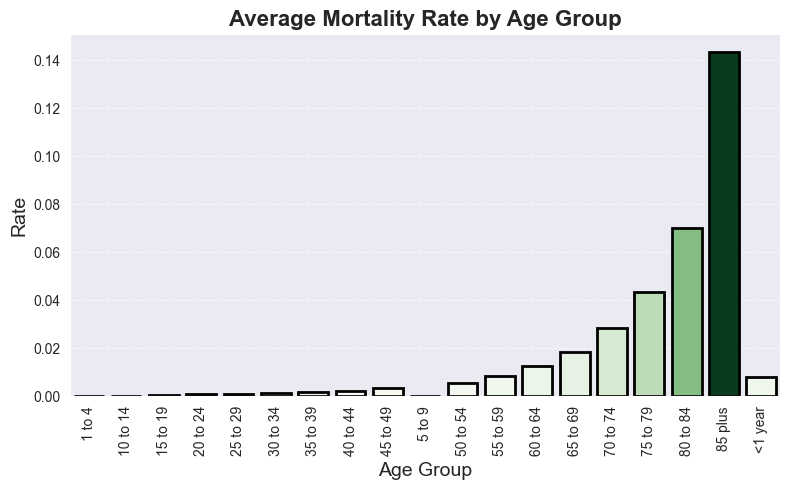

In [9]:
# prepare the data and plot bar plot
age_avg = mortality_df.groupby(['age_group_name']).agg({'val':'mean'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=age_avg, x='age_group_name', y='val', hue='val', palette='Greens', edgecolor='black', linewidth=2, legend=False)

plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.xticks(rotation=90)
plt.title('Average Mortality Rate by Age Group', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

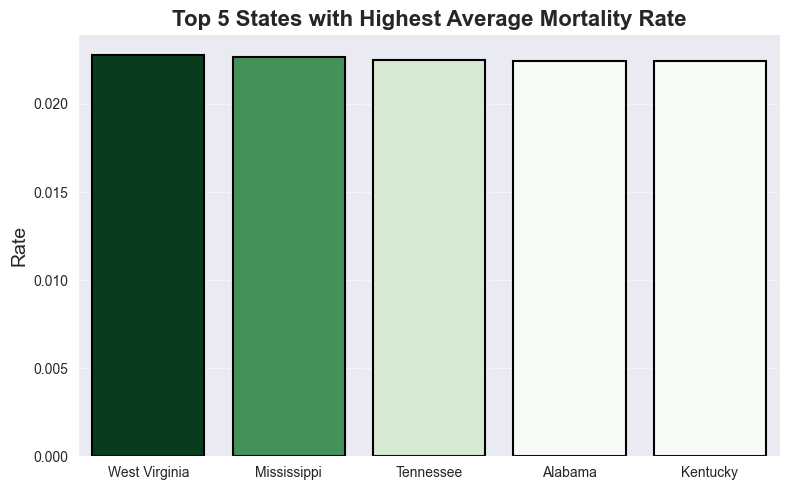

In [10]:
# prepare data for top 5 states
state_df = mortality_df.groupby(['state_name']).agg({'val':'mean'}).sort_values(by=['val'], ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=state_df, x='state_name', y='val', hue='val', palette='Greens', edgecolor='black', linewidth=1.5, legend=False)
plt.xlabel(None)
plt.ylabel('Rate', fontsize=14)
plt.title('Top 5 States with Highest Average Mortality Rate', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Machine Learning

In [11]:
# import relevant libraries for machine learning
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,explained_variance_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time

In [12]:
# define class for complete regression analysis
class regression_analyzer:
    def __init__(self, df):
        '''Initialize with analysis capabilities'''
        self.data = self._load_and_clean_data(df) # run the dataset through the cleaning pipeline
        # instantiate training and testing data
        self.X, self.y = None, None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.scaler = StandardScaler() # for scaling values to ensure integrity
        # dictionary containing all models to be tested
        self.models = {
            'Linear Regression': LinearRegression(),
            'Random Forest    ': RandomForestRegressor(n_estimators=100),
            'Gradient Boosting': GradientBoostingRegressor(),
            'XGBoost          ': XGBRegressor(),
            'LightGBM         ': LGBMRegressor()
        }
        self.results = {} # dictionary to store result metrics
        self.prepared_status = 0 # if data has been processed already
    
    # to return the head of the dataframe
    def heady(self):
        return self.data.head()
    
    # to analyze data features
    def infoy(self):
        return self.data.info()
    
    # method to clean and preprocess the dataset    
    def _load_and_clean_data(self, frame):
        '''Enhanced data loading and cleaning'''
        df = frame.copy() # copy the original dataset to ensure integrity
        df.dropna(subset=['val'], axis=0, inplace=True) # drop all null values 
        # drop columns that provide no predictive power for the model
        df.drop(columns=['measure_name', 'location_id', 'location_name', 
                         'state_name', 'sex_id', 'age_group_id', 'year_id', 'lower', 'upper'], inplace=True)
        df.drop(columns=[col for col in df.columns if df[col].nunique() == 1], inplace=True)
        # remove outliers from all numeric columns
        num_cols = df.select_dtypes(include=['number']).columns
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
        # reset index to preserve integrity and consistency of data
        df.reset_index(drop=True, inplace=True)
        
        return df # return processed dataframe

    # method to prepare data for modeling through encoding and scaling
    def prepare_data(self, test_size=0.3, vif=False, apply_pca=False):
        '''Enhanced data preparation with advanced preprocessing'''
        self.prepared_status = 1 # to ensure data has been transformed and scaled
        self.data['val'] = self.scaler.fit_transform(self.data[['val']]) # scale target variable
        # one hot encode all categorical features in dataframe
        self.data = pd.get_dummies(self.data, columns=self.data.select_dtypes(include=['object']).columns, dtype='int', drop_first=True)
        self.column_converter(self.data) # remove any symbols from column names

        # set up input and target data
        self.X = self.data.drop(columns=['val'])
        self.y = self.data['val']
        
        # perform variance inflation factor analysis if required
        if vif:
            self.variance_inflation_factor_analysis()

        # 70%-30% split to set up training and testing data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42)
        
        # perform principle component analysis if required
        if apply_pca:
            print("\nPerforming Prinicple Component Analysis (PCA)...")

            pca = PCA(n_components=10) # set components to 10 analyze explained variance
            pca.fit(self.X_train) # fit data to pca

            # plot cumulative explained variance
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), color='green', linewidth=2)

            plt.xlabel('Number of Components', fontsize=14)
            plt.ylabel('Cumulative Explained Variance', fontsize=14)
            plt.title('Cumulative Explained Variance vs. Number of Components', fontsize=16, fontweight='bold')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # store explained variance
            explained_variance = np.sum(pca.explained_variance_ratio_)
            print(f"Total explained variance by selected components: {explained_variance:.2f}")
            
            # only apply pca transformation if substantial variance explained
            if np.sum(pca.explained_variance_ratio_) < 0.9:
                print("PCA not applied - explained variance < 90%\n")
            else:
                self.X_train = pca.transform(self.X_train)
                self.X_test = pca.transform(self.X_test)
                print("PCA applied - explained variance > 90%\n")

    # method to remove symbols from column names
    def column_converter(self, df):
        symbols = ['!','£','$','%','^','&','*','(',')','/','\\','<','>',',','-',' ']
        new_columns = {} # dictionary to store the transformed column names
        for col in df.columns:
            new_col = col
            for sym in symbols:
                new_col = new_col.replace(sym, '_')
            new_columns[col] = new_col
        # rename all columns that included symbols
        df.rename(columns=new_columns, inplace=True)
    
    # method to run all machine learning models on transformed data
    def run_analysis(self, cross_val=False, verbose=False):
        '''Run complete analysis pipeline with all advanced techniques'''
        self.prepare_data() # run method to clean and transform data
        
        # train and test each model in self.models
        for name, model in self.models.items():
            print(f'Evaluating {name}')
            
            try:
                # fit the data on the model and record time measurements
                start_time = time.time() 
                model.fit(self.X_train, self.y_train)
                end_time = time.time()
                
                # use test data for predictions
                y_pred = model.predict(self.X_test)
                
                # run and store performance metrics
                self.results[name] = self.calculate_basic_metrics(self.y_test, y_pred)
                self.results[name]['train_time/s'] = round(end_time - start_time, 3)
                
                # print out the evaluation scores of model
                display(pd.DataFrame(data=self.results[name].values(),index=self.results[name].keys(),columns=[name]).transpose().head())
            # handle error exceptions 
            except Exception as e:
                print(f"Error with model {name}: {e}")
                self.results[name] = {'error': str(e)}
        # perform cross validation using method in case it is required
        if cross_val:
            print("\nRunning Cross Validation...\n")
            self.run_cross_analysis(verbose=verbose)
        # return metrics dictionary
        return self.results

    # method to carry out k fold cross validation
    def run_cross_analysis(self, k=5, verbose=False):
        '''Run complete analysis pipeline with k-Fold Cross Validation'''
        
        # prepare data incase it is not prepared
        if self.prepared_status == 0:
            self.prepare_data()
        
        # run crossvalidation for each model in self.models
        for name, model in self.models.items():
            print(f'Evaluating {name}')
            
            # fit the data on the model and record time measurements
            start = time.time()
            cv_scored = cross_validate(model,self.X,self.y,cv=k,scoring=['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error','explained_variance'])
            end = time.time()
            
            # print(cv_scored)
            
            # store average performance metrics after cross validation for each model
            self.results[name] = {
                'r2': round(cv_scored['test_r2'].mean(), 5),
                'mse': round(-cv_scored['test_neg_mean_squared_error'].mean(), 4),
                'rmse': round(-cv_scored['test_neg_root_mean_squared_error'].mean(), 4),
                'mae': round(-cv_scored['test_neg_mean_absolute_error'].mean(), 4),
                'explained_variance': round(cv_scored['test_explained_variance'].mean(), 4),
                'average_train_time/s': round((end - start)/k, 3)
            }
            
            # in case more text output is required
            if verbose:
                print(f'Average R²: {round(cv_scored['test_r2'].mean(), 4)}')
                print(f'Standard Deviation of R²: {round(cv_scored['test_r2'].std(), 4)}')
                print(f'Average training time: {round(self.results[name]['average_train_time/s'], 3)}s')
                print(" ")
    
    # method to extract feature importances of each model in self.models
    def print_feature_importance(self):
        for name, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                print(f"{name} Feature Importances:")
                feature_importances = model.feature_importances_
                sorted_idx = np.argsort(feature_importances)[::-1] # sort the features in descending order

                for idx in sorted_idx[:5]:
                    print(f"{self.X.columns[idx]}: {feature_importances[idx]:.4f}")
                
                print(" ")

    # method to calculate error metrics required
    def calculate_basic_metrics(self, y_true, y_pred):
        '''Calculate basic performance metrics'''
        return {
            'r2': round(r2_score(y_true, y_pred), 4),
            'adj_r2': round(1 - (1-r2_score(y_true, y_pred))*(len(y_true)-1)/(len(y_true)-self.X.shape[1]-1), 4),
            'mse': round(mean_squared_error(y_true, y_pred), 4),
            'rmse': round(np.sqrt(mean_squared_error(y_true, y_pred)), 4),
            'mae': round(mean_absolute_error(y_true, y_pred), 4),
            'explained_variance': round(explained_variance_score(y_true, y_pred), 4)
        }

    # method to carry out VIF analysis
    def variance_inflation_factor_analysis(self):
        print("\nPerforming Variance Inflation Factor Analysis (VIF)...")
        
        # prepare data incase it is not prepared
        if self.prepared_status == 0:
            self.prepare_data()
        
        vif_values = [] # to store results from VIF analysis
        vif_data = pd.DataFrame()
        vif_data['Feature'] = self.X.columns

        # iterate over each column and check result
        for i in range(self.X.shape[1]):
            try:
                vif = variance_inflation_factor(self.X.values, i)
                vif_values.append(vif) # store results
            # handle case in which ZeroDivisionError occurs
            except ZeroDivisionError:
                vif_values.append(np.inf)
        
        # format and print out VIF analysis results
        vif_data['VIF'] = vif_values
        vif_data.sort_values(by=['VIF'], ascending=False, inplace=True)
        vif_data.reset_index(drop=True, inplace=True)
        print(vif_data.head(10))
    
    # method to plot specific error metrics for each model
    def plot_model_comparison(self):
        # set up a 2x2 grid of subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
        # flatten the axes array for easier iteration
        axes = axes.flatten()
        metrics = ['r2', 'mse', 'rmse', 'mae'] # main error metrics to be plotted
        for i, metric in enumerate(metrics):
            ax = axes[i] # current axis for the subplot
            model_names = list(self.results.keys()) # store model names
            metric_values = [self.results[name].get(metric) for name in model_names] # get metric for specific model
            sns.barplot(y=model_names, x=metric_values, hue=metric_values, palette='Greens', edgecolor='black', linewidth=2, legend=False, ax=ax)

            ax.set_title(f"Model Comparison - {metric.upper()}", fontsize=16, fontweight='bold')
            ax.set_xlabel(f"{metric.upper()}", fontsize=14)
            ax.set_ylabel("Model", fontsize=14)
            ax.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [13]:
# instantiate regression analyzer on dataset
mortality_analysis = regression_analyzer(mortality_df)

## Data Preparation


Performing Variance Inflation Factor Analysis (VIF)...
                            Feature       VIF
0        race_ethnicity_group_White  2.026468
1  race_ethnicity_group_State_level  2.022471
2                     sex_name_Male  1.878898
3        race_ethnicity_group_Other  1.570567
4     race_ethnicity_group_Hispanic  1.535858
5           age_group_name_10_to_14  1.232630
6           age_group_name_45_to_49  1.232630
7           age_group_name_40_to_44  1.232630
8           age_group_name_25_to_29  1.232630
9           age_group_name_30_to_34  1.232630

Performing Prinicple Component Analysis (PCA)...


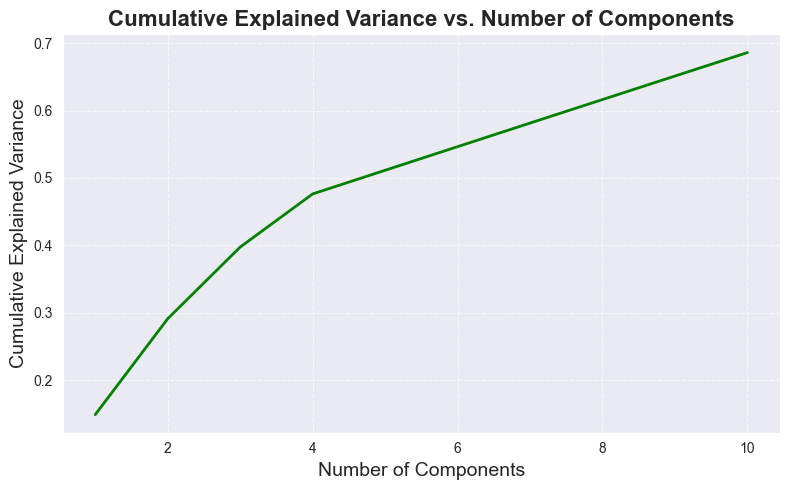

Total explained variance by selected components: 0.69
PCA not applied - explained variance < 90%



In [14]:
# prepare data through encoding and scaling (set test size and perform VIF and PCA here)
mortality_analysis.prepare_data(vif=True, apply_pca=True)

In [15]:
# analyze data structure and status
mortality_analysis.heady()

,val,race_ethnicity_group_Hispanic,race_ethnicity_group_Other,race_ethnicity_group_State_level,race_ethnicity_group_White,sex_name_Male,age_group_name_10_to_14,age_group_name_15_to_19,age_group_name_20_to_24,age_group_name_25_to_29,...,age_group_name_5_to_9,age_group_name_50_to_54,age_group_name_55_to_59,age_group_name_60_to_64,age_group_name_65_to_69,age_group_name_70_to_74,age_group_name_75_to_79,age_group_name_80_to_84,age_group_name_85_plus,age_group_name__1_year
0,-0.643269,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.641475,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.643581,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.643280,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.645724,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling and Evaluation

In [16]:
# run the machine learning models on data (perform cross validation here)
evals_m = mortality_analysis.run_analysis(cross_val=True, verbose=True)

Evaluating Linear Regression


,r2,adj_r2,mse,rmse,mae,explained_variance,train_time/s
Linear Regression,0.8819,0.8819,0.1183,0.3439,0.2239,0.8819,0.115


Evaluating Random Forest    


,r2,adj_r2,mse,rmse,mae,explained_variance,train_time/s
Random Forest,0.9348,0.9348,0.0653,0.2555,0.1334,0.9348,16.753


Evaluating Gradient Boosting


,r2,adj_r2,mse,rmse,mae,explained_variance,train_time/s
Gradient Boosting,0.9046,0.9046,0.0956,0.3091,0.1843,0.9046,8.154


Evaluating XGBoost          


,r2,adj_r2,mse,rmse,mae,explained_variance,train_time/s
XGBoost,0.9346,0.9345,0.0655,0.256,0.1356,0.9346,1.069


Evaluating LightGBM         
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 133198, number of used features: 22
[LightGBM] [Info] Start training from score -0.001313


,r2,adj_r2,mse,rmse,mae,explained_variance,train_time/s
LightGBM,0.9348,0.9348,0.0653,0.2555,0.1337,0.9348,0.443



Running Cross Validation...

Evaluating Linear Regression
Average R²: 0.8317
Standard Deviation of R²: 0.088
Average training time: 0.119s
 
Evaluating Random Forest    
Average R²: 0.8134
Standard Deviation of R²: 0.1686
Average training time: 13.96s
 
Evaluating Gradient Boosting
Average R²: 0.8439
Standard Deviation of R²: 0.0923
Average training time: 4.89s
 
Evaluating XGBoost          
Average R²: 0.8158
Standard Deviation of R²: 0.165
Average training time: 0.489s
 
Evaluating LightGBM         
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 152227, number of used features: 22
[LightGBM] [Info] Start training from score 0.004561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0

In [17]:
# print out feature importances for each model analyzed
mortality_analysis.print_feature_importance()

Random Forest     Feature Importances:
age_group_name_75_to_79: 0.2677
age_group_name_70_to_74: 0.2609
age_group_name_65_to_69: 0.1639
age_group_name_60_to_64: 0.0750
age_group_name_80_to_84: 0.0519
 
Gradient Boosting Feature Importances:
age_group_name_75_to_79: 0.2854
age_group_name_70_to_74: 0.2753
age_group_name_65_to_69: 0.1753
age_group_name_60_to_64: 0.0746
age_group_name_80_to_84: 0.0512
 
XGBoost           Feature Importances:
age_group_name_75_to_79: 0.3077
age_group_name_70_to_74: 0.2502
age_group_name_65_to_69: 0.1667
age_group_name_80_to_84: 0.0869
age_group_name_60_to_64: 0.0787
 
LightGBM          Feature Importances:
race_ethnicity_group_Hispanic: 339.0000
race_ethnicity_group_Other: 314.0000
sex_name_Male: 297.0000
race_ethnicity_group_White: 196.0000
race_ethnicity_group_State_level: 187.0000
 


In [18]:
# store and print out model performance results
evalutaion_metrics_mortality = pd.DataFrame(data=evals_m.values(),index=evals_m.keys())
evalutaion_metrics_mortality.sort_values(by=['r2'],ascending=False)

,r2,mse,rmse,mae,explained_variance,average_train_time/s
Gradient Boosting,0.84386,0.1579,0.3750,0.2461,0.8720,4.890
Linear Regression,0.83166,0.1682,0.3948,0.2738,0.8600,0.119
XGBoost,0.81584,0.1813,0.3796,0.2201,0.8545,0.489
LightGBM,0.81438,0.1828,0.3803,0.2175,0.8528,0.576
Random Forest,0.81340,0.1838,0.3811,0.2183,0.8527,13.960


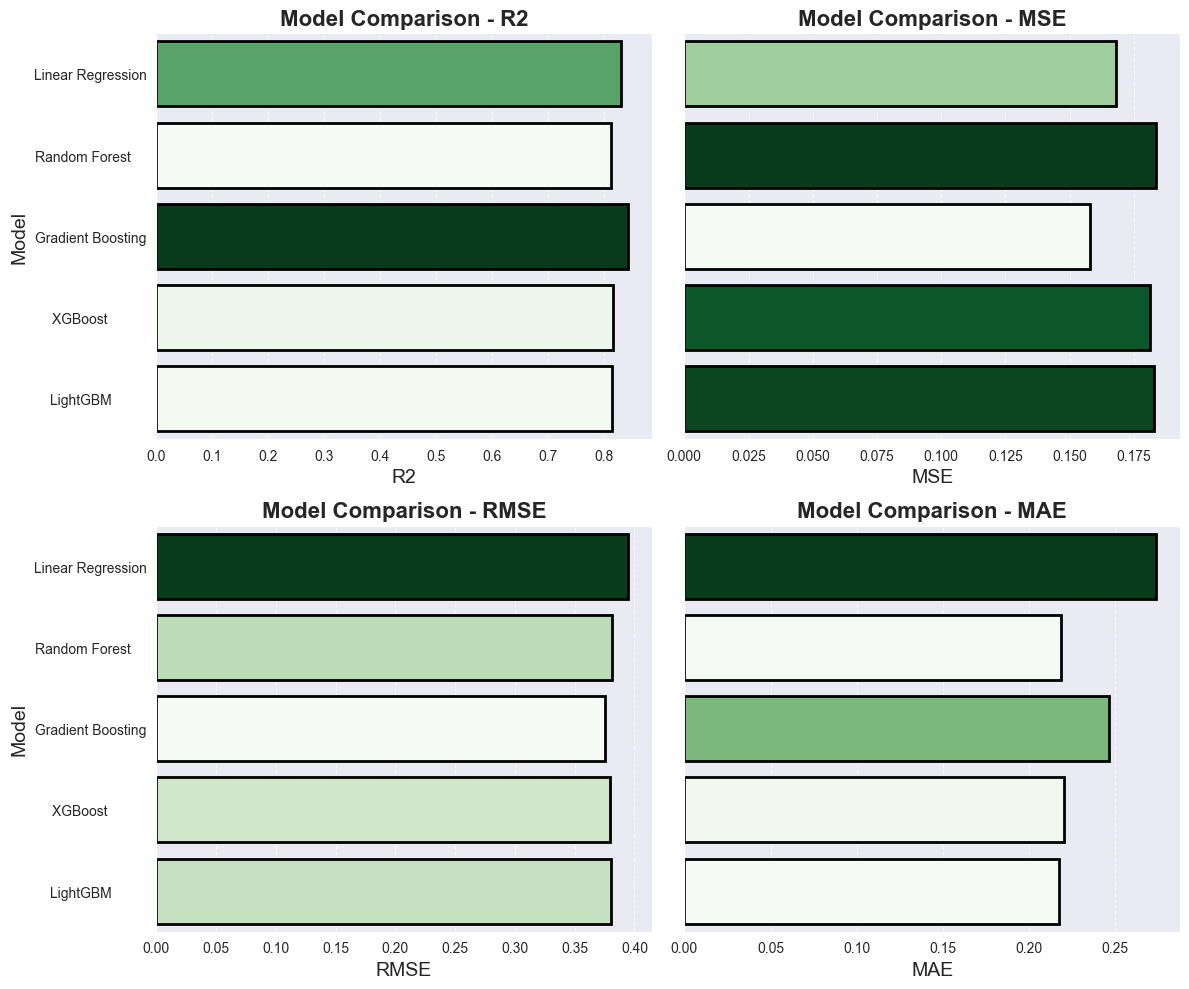

In [ ]:
# compare different error metrics for each model analyzed
mortality_analysis.plot_model_comparison()